# Task 0: Fashion MNIST classification in Pytorch (10 points)

The goal of this task is to get you familiar with [Pytorch](https://pytorch.org/), teach you to debug your models, and give you a general understanding of deep learning and computer vision work-flows.

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of [Zalando’s](https://jobs.zalando.com/tech/) article images — consisting of 70,000 grayscale images in 10
categories. Each example is a 28x28 grayscale image, associated with a label from 10 classes. ‘Fashion-
MNIST’ is intended to serve as a direct **drop-in replacement** for the original [MNIST](http://yann.lecun.com/exdb/mnist/) dataset — often
used as the “Hello, World” of machine learning programs for computer vision. It shares the same image
size and structure of training and testing splits. We will use 60,000 images to train the network and
10,000 images to evaluate how accurately the network learned to classify images.

In [1]:
# installation directions can be found on pytorch's webpage
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

# import our network module from simple_cnn.py
from simple_cnn import SimpleCNN              # be sure to modify or you may have to restart kernel!

Usually you'll parse arguments using `argparse` (or similar library) but we can simply use a stand-in object for ipython notebooks. Furthermore, PyTorch can do computations on NVidia `GPU`s or on normal `CPU`s. You can configure the setting using the `device` variable.

In [2]:
class ARGS(object):
    # input batch size for training 
    batch_size = 64
    # input batch size for testing
    test_batch_size=1000
    # number of epochs to train for
    epochs = 14
    # learning rate
    lr = 1.0
    # Learning rate step gamma
    gamma = 0.7
    # how many batches to wait before logging training status
    log_every = 100
    # how many batches to wait before evaluating model
    val_every = 100
    # set true if using GPU during training
    use_cuda = True

args = ARGS()
device = torch.device("cuda" if args.use_cuda else "cpu")

We define some basic testing and training code. The testing code prints out the average test loss and the training code (`main`) plots train/test losses and returns the final model.

In [3]:
def test(model, device, test_loader):
    """Evaluate model on test dataset."""
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    # print("TEST ACCURACY: ", 100. * correct / len(test_loader.dataset))
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    return test_loss, correct / len(test_loader.dataset)


def main():
    # 1. load dataset and build dataloader
    train_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.test_batch_size, shuffle=True)

    # 2. define the model, and optimizer.
    model = SimpleCNN().to(device)
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=args.gamma)
    cnt = 0
    train_log = {'iter': [], 'loss': [], 'accuracy': []}
    test_log = {'iter': [], 'loss': [], 'accuracy': []}
    for epoch in range(args.epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            # Get a batch of data
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            # print("Size of data epoch data input: ",data.size())
            # Forward pass
            output = model(data)
            # Calculate the loss
            loss = F.cross_entropy(output, target)
            # Calculate gradient w.r.t the loss
            loss.backward()
            # Optimizer takes one step
            optimizer.step()
            # Log info
            if cnt % args.log_every == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, cnt, len(train_loader.dataset),
                           100. * batch_idx / len(train_loader), loss.item()))
                train_log['iter'].append(cnt)
                train_log['loss'].append(loss)
                # TODO: calculate your train accuracy!
                mod_pred = torch.argmax(output,dim=1) 
                correct = mod_pred==target
                correct = correct.long()
                correct = sum(correct)               
                train_acc = correct.float()/args.batch_size
                train_log['accuracy'].append(train_acc)
                # print("TRAINING ACCURACY: ", train_acc)
            # Validation iteration
            if cnt % args.val_every == 0:
                test_loss, test_acc = test(model, device, test_loader)
                test_log['iter'].append(cnt)
                test_log['loss'].append(test_loss)
                test_log['accuracy'].append(test_acc)
                model.train()
            cnt += 1
        scheduler.step()
    fig = plt.figure()
    plt.plot(train_log['iter'], train_log['loss'], 'r', label='Training')
    plt.plot(test_log['iter'], test_log['loss'], 'b', label='Testing')
    plt.title('Loss')
    plt.legend()
    fig = plt.figure()
    plt.plot(train_log['iter'], train_log['accuracy'], 'r', label='Training')
    plt.plot(test_log['iter'], test_log['accuracy'], 'b', label='Testing')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
    return model

## 0.1 Bug Fix and Hyper-parameter search. (2pts)

Simply running `main` will result in a `RuntimeError`! Check out `simple_cnn.py` and see if you can fix the bug. You may have to restart your ipython kernel for changes to reflect in the notebook. After that's done, be sure to fill in the TODOs in `main`.


Once you fix the bugs, you should be able to get a reasonable accuracy within 100 iterations just by tuning some hyper-parameter. Include the train/test plots of your best hyperparamter setting and comment on why you think these settings worked best. (you can complete this task on CPU)

**YOUR ANSWER HERE**

![title](img/q0_img01_loss.png)

![title](img/q0_img02_accuracy.png)

During the training period with the old hyper-parameters, one can notice that the accuracy of the test and training data was plateauing after a set number of epochs. As such, the number of epochs were reduced to 8. The batch size was increased to 128 to speed up the training period as well. The learning rate was significantly large so it was reduced down to 0.01. In the end, the accuracy of the training and testing sets were able to break the 80% mark.




args.batch_size = 128
args.epochs = 8
args.gamma = 0.7
args.log_every = 100
args.lr = 0.01
args.test_batch_size = 1000
args.val_every = 100



Train Epoch: 0 [0/60000 (0%)]	Loss: 2.302593

Test set: Average loss: 5.3219, Accuracy: 2773/10000 (28%)

Train Epoch: 0 [100/60000 (21%)]	Loss: 0.501979

Test set: Average loss: 0.6558, Accuracy: 7733/10000 (77%)

Train Epoch: 0 [200/60000 (43%)]	Loss: 0.439888

Test set: Average loss: 0.6055, Accuracy: 7764/10000 (78%)

Train Epoch: 0 [300/60000 (64%)]	Loss: 0.645565

Test set: Average loss: 0.5559, Accuracy: 8035/10000 (80%)

Train Epoch: 0 [400/60000 (85%)]	Loss: 0.555263

Test set: Average loss: 0.5344, Accuracy: 8134/10000 (81%)

Train Epoch: 1 [500/60000 (7%)]	Loss: 0.434446

Test set: Average loss: 0.5238, Accuracy: 8158/10000 (82%)

Train Epoch: 1 [600/60000 (28%)]	Loss: 0.696253

Test set: Average loss: 0.5123, Accuracy: 8171/10000 (82%)

Train Epoch: 1 [700/60000 (49%)]	Loss: 0.478521

Test set: Average loss: 0.4971, Accuracy: 8250/10

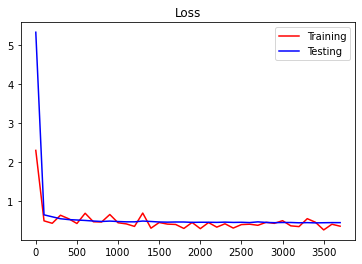

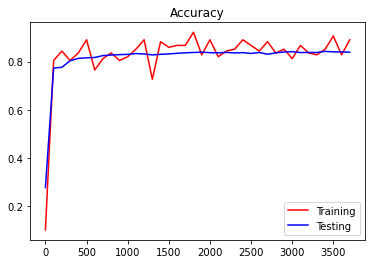

In [4]:
#### FEEL FREE TO MODIFY args VARIABLE HERE OR ABOVE ####
# args.gamma = float('inf')
args.lr = 0.01 # lowered 
args.epochs = 8
args.batch_size = 128



# DON'T CHANGE
# prints out arguments and runs main
for attr in dir(args):
    if '__' not in attr and attr !='use_cuda':
        print('args.{} = {}'.format(attr, getattr(args, attr)))
print('\n\n')
model = main()

## Play with parameters.(3pt)
How many trainable parameters does the trained model have?

Model has 454922 params

In [7]:
def param_count(model):
    try:
        numParam = sum(iterVal.numel() for iterVal in model.parameters() if iterVal.requires_grad)
        return numParam
    except:
        raise NotImplementedError
print('Model has {} params'.format(param_count(model)))

Model has 454922 params


## Deep Linear Networks?!? (5pt)
Until this point, there are no non-linearities in the SimpleCNN! (Your TAs were just as surprised as you are at the results.) Your next task is to modify the code to add non-linear activation layers, and train your model in full scale. Make sure to add non-linearities at **every** applicable layer.

Compute the loss and accuracy curves on train and test sets after 5 epochs.

![title](img/q0_img03_loss.png)
![title](img/q0_img04_accuracy.png)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.290475

Test set: Average loss: 1.9010, Accuracy: 4256/10000 (43%)

Train Epoch: 0 [100/60000 (21%)]	Loss: 0.765751

Test set: Average loss: 0.5742, Accuracy: 7938/10000 (79%)

Train Epoch: 0 [200/60000 (43%)]	Loss: 0.619610

Test set: Average loss: 0.5629, Accuracy: 8009/10000 (80%)

Train Epoch: 0 [300/60000 (64%)]	Loss: 0.409301

Test set: Average loss: 0.5404, Accuracy: 8091/10000 (81%)

Train Epoch: 0 [400/60000 (85%)]	Loss: 0.525194

Test set: Average loss: 0.5110, Accuracy: 8216/10000 (82%)

Train Epoch: 1 [500/60000 (7%)]	Loss: 0.520956

Test set: Average loss: 0.4909, Accuracy: 8258/10000 (83%)

Train Epoch: 1 [600/60000 (28%)]	Loss: 0.408131

Test set: Average loss: 0.4955, Accuracy: 8290/10000 (83%)

Train Epoch: 1 [700/60000 (49%)]	Loss: 0.392827

Test set: Average loss: 0.4915, Accuracy: 8274/10000 (83%)

Train Epoch: 1 [800/60000 (71%)]	Loss: 0.554026

Test set: Average loss: 0.4971, Accuracy: 8231/10000 (82%)

Train Epoch: 1 [900/600

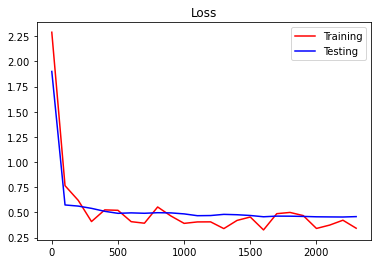

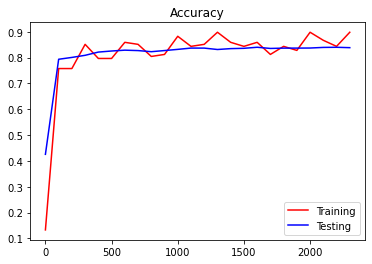

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Sequential(
    (0): Linear(in_features=3136, out_features=128, bias=True)
  )
  (fc2): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [8]:
args.epochs = 5
args.lr = 1e-3
main()

Where did you add your non-linearities? 

**YOUR ANSWER HERE**

I added ReLU activation layers after each of the two convolution layers. I also added a ReLU activation after the first fully-connected layer. I did not apply a softmax at the second fully-connected layer because the cross_entropy loss function defined in main() contains the softmax function.

<br><br><br>
Provide some insights on why the results was fairly good even without activation layers. (**2** pts)

**YOUR ANSWER HERE**

The contents of the objects in the images of the dataset were presented in a standardized way. There was no occulsion or varying configurations of most of the objects in each class. For this reason, a model can generalize the dataset with good performance throught the use of linear filters and logistic regression lines. The classification for shoes, for examples, can be adequately characterized through a set of logistic regression lines along the edges of the shoe. The same thing may be said for jackets and pants. Differentiations between classes may be significant enough to be separated via logistic regression rather than a nonlinear function.

Another reason may be that the images of the same classification reside within the same sections of the frames compared to other class images. For example, trouser images usually occupy a rectangular area around the center of the image frame. Ankle boots usually occupy the lower-right diagonal half of the image. Given a linear network model with no activation functions, straight regression lines can be used to encompass common firing zones for certain classes. From this thought, nonlinear activations are not needed for the success of the model.
